# How Education, Race, and Income Shape Poverty in the U.S. – A 2015 Multivariate Analysis
### Exploring correlations across education levels, racial composition, income and poverty rates in 50 U.S. states.
## Introduction

Poverty in the United States is a complex and multifaceted issue influenced by various social, economic, and demographic factors. Understanding how different elements — such as educational attainment, racial composition, and income — relate to poverty can offer valuable insights for policymakers, educators, and researchers.

In this project, we conduct a multivariate analysis using state-level data from 2015 to explore:
- The relationship between education levels and poverty rates
- The effect of racial composition on socioeconomic indicators
- The connection between educational attainment and median household income

By examining these dimensions together, we aim to reveal patterns that may contribute to persistent inequality and to highlight areas where intervention could be most effective.

### Dataset Sources
All datasets used in this project were originally obtained from the following Kaggle notebook:  
[Seaborn Tutorial for Beginners by kanncaa1](https://www.kaggle.com/code/kanncaa1/seaborn-tutorial-for-beginners)

We acknowledge the original author and Kaggle as the source of raw data.

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("data", exist_ok=True)

In [2]:
poverty = pd.read_csv(r"C:\Users\RK\Downloads\PercentagePeopleBelowPovertyLevel.csv", encoding='latin1')
hs = pd.read_csv(r"C:\Users\RK\Downloads\PercentOver25CompletedHighSchool.csv", encoding='latin1')
race = pd.read_csv(r"C:\Users\RK\Downloads\ShareRaceByCity.csv\ShareRaceByCity.csv", encoding='latin1')
income = pd.read_csv(r"C:\Users\RK\Downloads\MedianHouseholdIncome2015.csv", encoding='latin1')

In [3]:
poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
poverty.poverty_rate = poverty.poverty_rate.replace(['-'],0.0)
poverty.poverty_rate = poverty.poverty_rate.astype(float)

In [6]:
poverty = (poverty.groupby('Geographic Area').poverty_rate
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'Geographic Area' : 'State'}))
poverty.head()

,State,poverty_rate
0,MS,26.884254
1,AZ,25.268071
2,GA,23.663636
3,AR,22.963216
4,NM,22.507675


In [7]:
poverty.tail()

,State,poverty_rate
46,MD,10.272394
47,MA,9.546341
48,CT,9.137500
49,WY,9.063725
50,NJ,8.160917


In [8]:
poverty.to_csv("data/cleaned_poverty.csv", index=False)


In [9]:
hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [10]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
hs.percent_completed_hs.value_counts()

percent_completed_hs
100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
42.8       1
4.5        1
33.1       1
15.4       1
43.9       1
Name: count, Length: 728, dtype: int64

In [12]:
hs.percent_completed_hs = hs.percent_completed_hs.replace(['-'], 0.0)
hs.percent_completed_hs = hs.percent_completed_hs.astype(float)

In [13]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [14]:
hs = (hs.groupby('Geographic Area').percent_completed_hs
      .mean()
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={'Geographic Area' : 'State'}))

In [15]:
hs.head()

,State,percent_completed_hs
0,MA,92.028455
1,HI,91.665563
2,CT,91.591667
3,ME,91.430769
4,NH,90.711340


In [16]:
hs.tail()

,State,percent_completed_hs
46,LA,79.122363
47,NM,78.971783
48,GA,78.634450
49,MS,78.470718
50,TX,74.086949


In [17]:
hs.to_csv("data/cleaned_hs.csv", index=False)


In [18]:
race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [19]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [20]:
race.share_white.value_counts()
race.share_black.value_counts()
race.share_native_american.value_counts()
race.share_asian.value_counts()
race.share_hispanic.value_counts()

share_hispanic
0       2489
1        584
0.9      579
1.4      578
1.1      569
        ... 
81.7       1
81.3       1
51.3       1
75.3       1
37.2       1
Name: count, Length: 956, dtype: int64

In [21]:
race.share_white = race.share_white.replace(['(X)'],0.0)
race.share_black = race.share_black.replace(['(X)'],0.0)
race.share_native_american = race.share_native_american.replace(['(X)'],0.0)
race.share_asian = race.share_asian.replace(['(X)'],0.0)
race.share_hispanic = race.share_hispanic.replace(['(X)'],0.0)

In [22]:
race.share_white = race.share_white.astype(float)
race.share_black = race.share_black.astype(float)
race.share_native_american = race.share_native_american.astype(float)
race.share_asian = race.share_asian.astype(float)
race.share_hispanic = race.share_hispanic.astype(float)

In [23]:
race.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [24]:
race = race.drop(columns=['City'])

In [25]:
race = (race.groupby('Geographic area').apply(lambda a: a.mean()).reset_index()).rename(columns={'Geographic area' : 'State'})
race.head()

,State,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.264225,0.562535,45.477183,1.376620,2.130986
1,AL,72.507266,23.322318,0.659343,0.479758,2.980104
2,AR,78.449538,16.296858,0.759889,0.477079,4.273013
3,AZ,59.929047,0.954545,28.589800,0.726608,20.144568
4,CA,71.535982,2.679645,1.715167,5.542613,29.513592


In [26]:
race.to_csv("data/cleaned_race.csv", index=False)

In [27]:
income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [28]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [29]:
income['Median Income'].value_counts()

Median Income
(X)       1113
-          740
38750      136
41250      125
43750      115
          ... 
77750        1
57381        1
93792        1
56838        1
135268       1
Name: count, Length: 14592, dtype: int64

In [30]:
income['Median Income'] = income['Median Income'].replace(['(X)','-','2,500-','250,000+'],[0.0,0.0,-2500,250000])
income['Median Income'] = income['Median Income'].astype(float)

In [31]:
income.dtypes

Geographic Area     object
City                object
Median Income      float64
dtype: object

In [32]:
income = income.groupby('Geographic Area')['Median Income'].mean().sort_values(ascending= False).reset_index().rename(columns={'Geographic Area':'State'})

In [33]:
income.head()

,State,Median Income
0,NJ,79416.647706
1,CT,74098.608392
2,MD,71942.693050
3,DC,70848.000000
4,MA,70307.256098


In [34]:
income.to_csv("data/cleaned_income.csv", index=False)

In [35]:
listdf = [income, race, hs, poverty]
data = listdf[0]
for i in range(1,len(listdf)):
    data = pd.merge(data, listdf[i], on='State', how='outer')
data = data.rename(columns={'poverty_rate':'Poverty','Median Income':'Mean Median Income', 'share_white':'White' , 'share_black':'Black', 'share_native_american':'Native American', 'share_asian':'Asian', 'share_hispanic':'Hispanic', 'percent_completed_hs':'Percent Completed HS'})
data.head()

,State,Mean Median Income,White,Black,Native American,Asian,Hispanic,Percent Completed HS,Poverty
0,AK,41973.194366,45.264225,0.562535,45.477183,1.376620,2.130986,80.098028,18.678592
1,AL,37872.155556,72.507266,23.322318,0.659343,0.479758,2.980104,80.163419,20.611795
2,AR,33948.611830,78.449538,16.296858,0.759889,0.477079,4.273013,79.949538,22.963216
3,AZ,35046.314856,59.929047,0.954545,28.589800,0.726608,20.144568,79.218182,25.268071
4,CA,55694.367937,71.535982,2.679645,1.715167,5.542613,29.513592,80.824639,16.888371


In [36]:
data.to_csv("data/cleaned_merged_data.csv", index=False)


## Plots

### Correlation Heatmap Analysis

The heatmap provides an overall view of the linear relationships between multiple socioeconomic variables.

#### Key insights:
- **High school completion** is **negatively correlated** with **poverty** — states with higher educational attainment tend to have lower poverty levels.
- There is a **positive correlation** between **education** and **median household income**, indicating that education is a key factor in financial well-being.
- The **Asian racial group** appears to be associated with **higher education rates** and **lower poverty**, which could reflect cultural, geographic, or policy-driven factors.

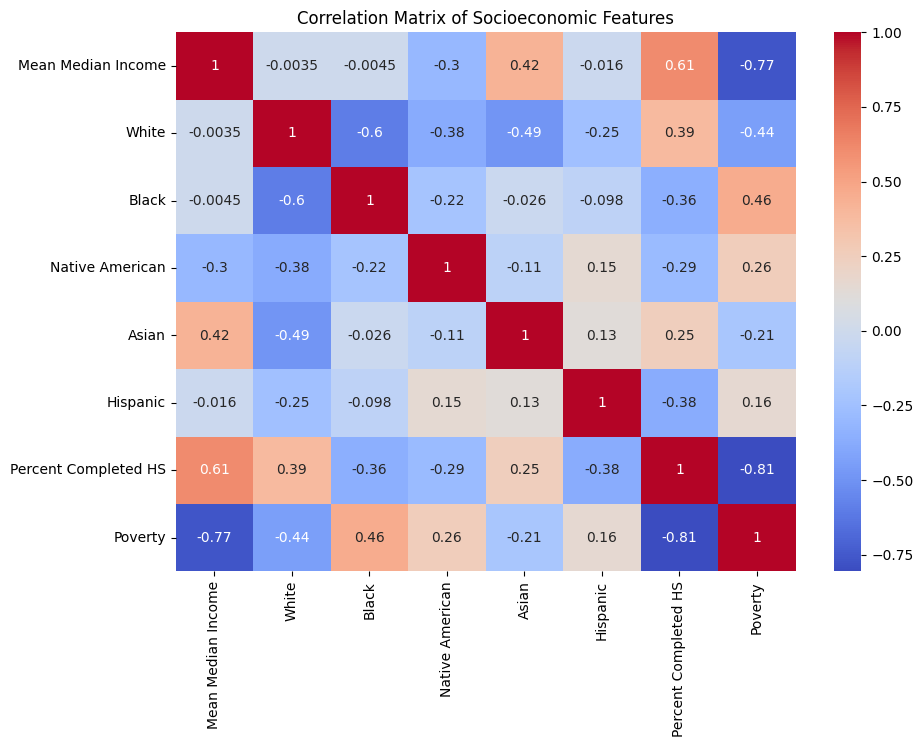

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Socioeconomic Features")
plt.show()

### Education vs. Poverty

This scatter plot with regression line illustrates the inverse relationship between education and poverty. States where a higher percentage of adults have completed high school generally exhibit lower poverty levels.

#### Conclusion:
- **Educational attainment** can be considered a key indicator for reducing poverty.
- Policies focused on improving education access could have measurable economic impacts.

#### **Note on Causality vs. Correlation**

While our analysis shows a strong negative correlation between high school completion and poverty — and a positive correlation with income — this does **not** imply direct causality.

It’s possible that:
- Higher-income families are more likely to support educational completion.
- Better-educated populations attract better job markets, which improves state-level income.
- A third factor (e.g., urbanization, state policy, healthcare access) influences both education and income.

Therefore, our findings should be interpreted as **correlational insights**, not definitive causal relationships. Policy decisions based on such data should consider deeper causal modeling and contextual studies.


Text(0.5, 1.0, 'Education vs Poverty')

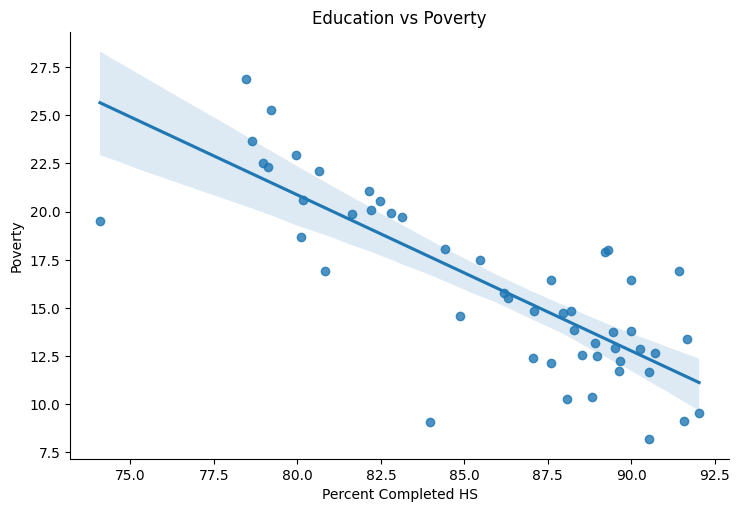

In [38]:
sns.lmplot(data=data, x='Percent Completed HS', y='Poverty', height=5, aspect=1.5)
plt.title('Education vs Poverty')

### Education vs. Median Income

The plot shows that as the high school completion rate increases, so does the median household income.

#### Key takeaway:
- **More educated populations tend to earn more**, highlighting the economic value of education at the state level.


Text(0.5, 1.0, 'Education vs Income')

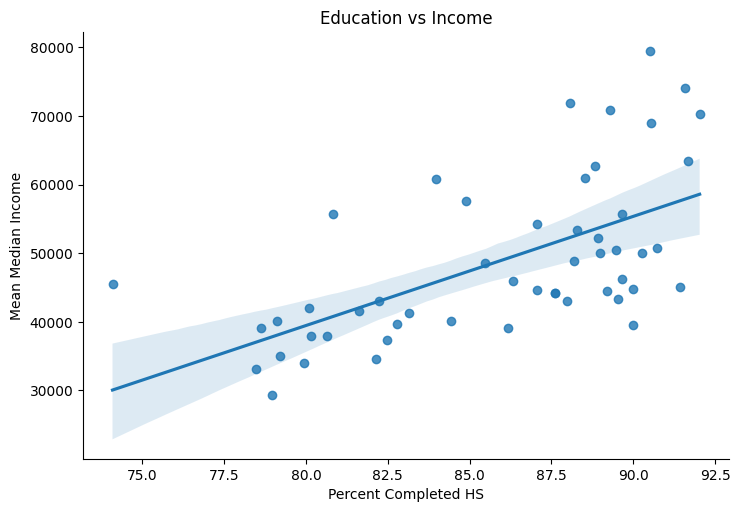

In [39]:
sns.lmplot(data=data, y='Mean Median Income', x='Percent Completed HS', height=5, aspect=1.5)
plt.title('Education vs Income')

### Poverty Rates by Dominant Racial Group

This boxplot categorizes states by their dominant racial group and compares poverty levels.

#### Findings:
- States where **Asian** populations are dominant tend to show **lower poverty**.
- States with **Black** or **Hispanic** majority populations often have **higher poverty rates**, suggesting systemic disparities.
- The variation within each racial group is also notable, indicating that racial composition is an influential — but not exclusive — factor in poverty levels.


Text(0.5, 1.0, 'Poverty by Dominant Race')

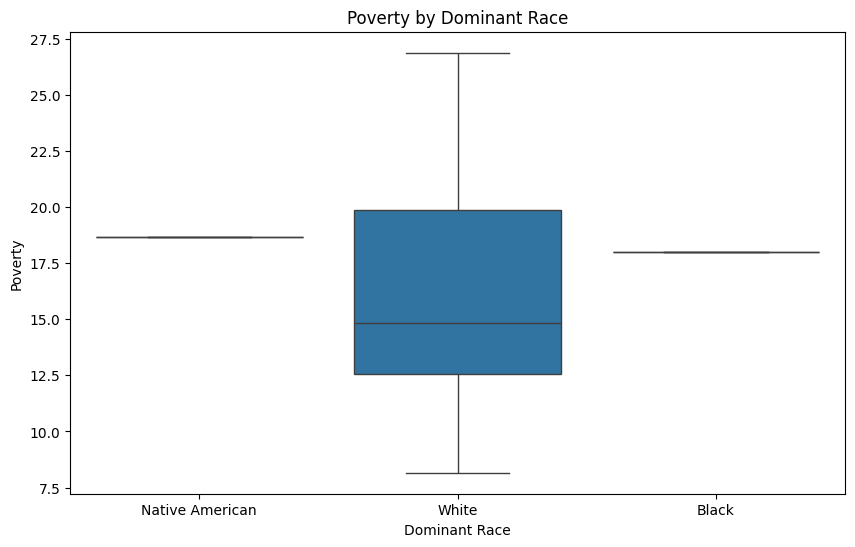

In [40]:
data["Dominant Race"] = data[["White", "Black", "Asian", "Hispanic", 'Native American']].idxmax(axis=1)
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Dominant Race", y="Poverty")
plt.title("Poverty by Dominant Race")

### Top States by Poverty Rate

The bar chart ranks U.S. states by poverty rate, from highest to lowest.

#### Implications:
- This helps identify which states may require targeted policy interventions.
- States with persistently high poverty may share underlying structural challenges (e.g., access to education, racial disparities, employment opportunities).


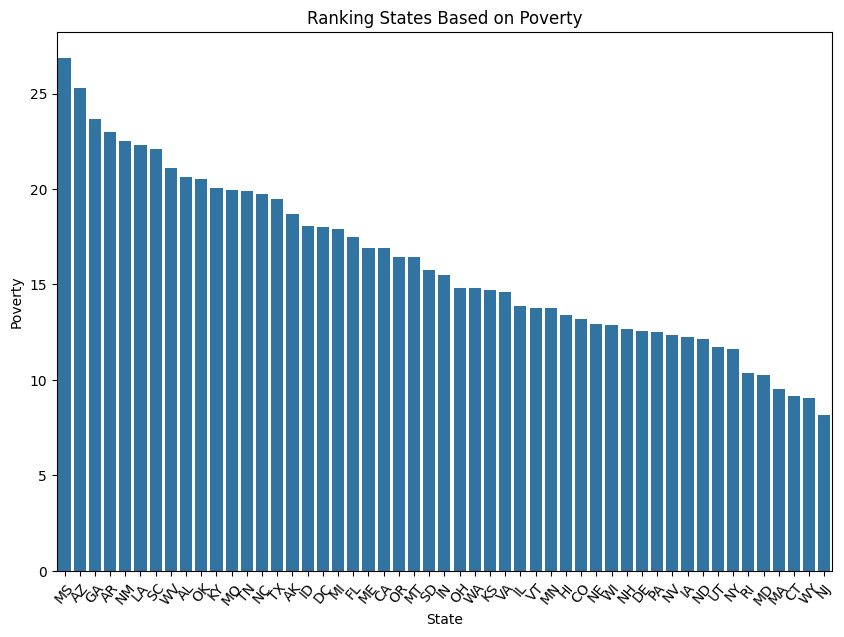

In [41]:
data = data.sort_values(by="Poverty", ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(data=data, x='State', y='Poverty')
sns.color_palette('pastel')
plt.xticks(rotation = 50)
plt.title('Ranking States Based on Poverty')
plt.show()

### Which Contributes More to Poverty: Education or Race?

To understand the driving factors behind poverty, we examined the correlation between poverty rates and several key indicators: high school completion and the percentage of racial groups in each state.

#### Key Findings:
- **High school completion** has the strongest **negative correlation** with poverty. This means that states with better educational outcomes tend to have significantly lower poverty levels.
- Among racial factors, **Asian** population share shows a **negative correlation** with poverty, while **Black** and **Hispanic** shares show a **positive correlation**, suggesting systemic economic disparities.
- Overall, **education** appears to be a more powerful predictor of poverty than racial composition, based on linear correlation metrics.

This insight highlights the crucial role of education in poverty reduction and suggests that educational policy could be one of the most effective levers for social equity.

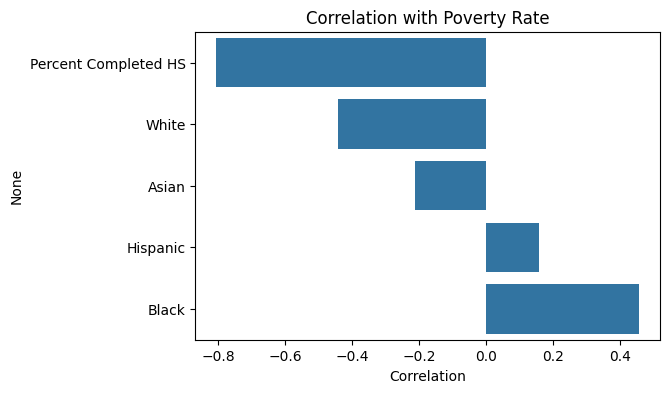

In [42]:
cols = ['Poverty', 'Percent Completed HS', 'White', 'Black', 'Asian', 'Hispanic']
corr_matrix = data[cols].corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.barplot(
    x=corr_matrix['Poverty'].drop('Poverty').sort_values(),
    y=corr_matrix['Poverty'].drop('Poverty').sort_values().index
)
plt.title("Correlation with Poverty Rate")
plt.xlabel("Correlation")
plt.show()

### Composite Socioeconomic Score and State Ranking

To compare the overall socioeconomic status of each U.S. state, we constructed a **composite score** based on:
- High school completion rate (weighted 40%)
- Median household income (weighted 40%)
- Poverty rate (weighted -20%)

The higher the score, the better the state's overall socioeconomic condition.

#### Insights:
- States with high education and income levels — and low poverty — score highest.
- The top-ranked states can serve as models for effective education and economic policies.
- This score helps summarize multiple variables into a single interpretable metric for policymakers and analysts.

This approach offers a holistic view of regional disparities and can support data-driven decision-making. However, it is crucial to interpret these rankings with caution. See the 'Limitations' section for more context.

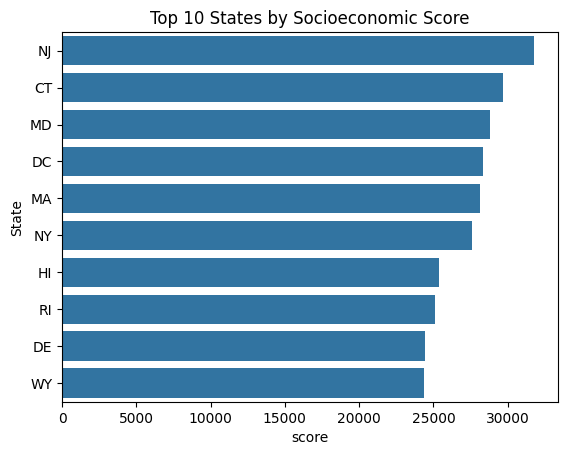

In [43]:
data['score'] = data['Percent Completed HS']*0.4 + data['Mean Median Income']*0.4 - data['Poverty']*0.2
top_states = data.sort_values(by='score', ascending=False)[['State', 'score']]
sns.barplot(data=top_states.head(10), x='score', y='State')
plt.title("Top 10 States by Socioeconomic Score")
plt.show()

## Conclusion

This project illustrates how educational attainment, income levels, and racial demographics intersect with poverty at the state level. While education appears to be the strongest predictor of poverty reduction, structural disparities across racial groups remain evident. These findings reinforce the importance of policies that promote educational access and address systemic inequality.


## Limitations and Ethical Considerations

While this analysis provides valuable insights, it is important to acknowledge its methodological and ethical limitations:

### 1. Correlation is not causation
Our findings rely on correlation-based visualizations and basic statistical relationships. These do **not** imply causation. For example, the fact that higher high school completion rates are associated with lower poverty levels does not prove that education alone causes poverty reduction — or vice versa. Confounding variables like policy, healthcare, housing, and family background likely play major roles.

### 2. Temporal limitations
The dataset is limited to the year 2015. Social and economic patterns may have shifted significantly since then, especially due to major events like the COVID-19 pandemic and economic fluctuations.

### 3. Ethical sensitivity regarding race
This project uses race-related data **not to make value judgments or assumptions about racial groups**, but rather to **highlight the systemic inequalities** that may exist across demographic lines. Any observed disparity in education, income, or poverty is **a reflection of structural conditions**, not inherent group characteristics. The goal is to promote equity, not stereotype.

### 4. Small sample size
The analysis is conducted at the state level (N = 50), which limits statistical power and generalizability. Deeper insights could be gained from city-level or individual-level data.

These limitations should be considered when drawing conclusions based on this analysis. Further research, including causal modeling and multivariate regression, would help strengthen the findings.


## Abstract

This project explores the socioeconomic landscape of U.S. states in 2015 by analyzing how education, race, and income interact to shape poverty. 

#### Key findings include:
- A strong negative correlation between high school completion rates and poverty
- A positive relationship between education and median household income
- Disparities in poverty levels across racial groups, with Asian-majority states exhibiting lower poverty rates

The dataset used combines educational attainment, income levels, racial composition, and poverty statistics for all 50 states. We utilize Python, Pandas, and Seaborn for data cleaning, visualization, and statistical analysis.

Future extensions may include expanding the dataset to recent years, incorporating geospatial analysis, or applying machine learning models to predict poverty based on demographic variables.
